<a href="https://colab.research.google.com/github/raquel-maia/python-dados/blob/main/Modelos_de_Classifica%C3%A7%C3%A3o_e_Regress%C3%A3o_Log%C3%ADstica_Atividade_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import scipy.stats as stat #biblioteca para estatística

In [ ]:
from ctypes import DEFAULT_MODE
#regressçao simples

#Roda OLS

##IMPORTAR PACOTE
import statsmodels.api as sm

In [ ]:
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
# Adicionar a coluna 'species' com os valores de 'iris.target'
iris_df['species'] = iris.target

# Adicionar a coluna 'species name' com os nomes das espécies
iris_df['species name'] = pd.Categorical.from_codes(iris.target, iris.target_names)

1. Utilizando o dataset iris (iris.csv em anexo ou usando o sklearn):

Exemplo de como fazer a importação do dataset usando o sklearn from sklearn import datasets

iris = datasets.load_iris()

Responda:

# a. Faça uma análise inicial sobre esse dataset

In [ ]:
#verificar os dados iniciais e finais do data

iris_df.sample(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species name
43,5.0,3.5,1.6,0.6,0,setosa
119,6.0,2.2,5.0,1.5,2,virginica
133,6.3,2.8,5.1,1.5,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
...,...,...,...,...,...,...
63,6.1,2.9,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
17,5.1,3.5,1.4,0.3,0,setosa
18,5.7,3.8,1.7,0.3,0,setosa


Temos:

150 linhas e 5 colunas

Sepal_Length - Sépala_Comprimento

Sepal_Width	- Sépala_Largura

Petal_Length - Comprimeto_petála

Petal_Width - Pétala_largura

Species - Espécies


In [ ]:
#verificar as variáveis

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    int64   
 5   species name       150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


Análise do Resultado
Count (Contagem):

Há 150 entradas na variável Species, o que indica que não há valores ausentes para esta variável.
Unique (Únicos):

Existem 3 valores únicos na variável Species, indicando que há três espécies diferentes de flores no conjunto de dados.
Top (Mais Frequente):

A espécie mais comum é setosa.
Freq (Frequência):

A espécie setosa aparece 50 vezes no conjunto de dados.

In [ ]:
vari_number=iris_df.describe()
vari_number

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Descrição das Estatísticas
Contagem (count):

Todas as características têm 150 amostras, indicando que não há valores ausentes no conjunto de dados.
Média (mean):

Comprimento da Sépala (Sepal Length): A média é de 5.84 cm.
Largura da Sépala (Sepal Width): A média é de 3.06 cm.
Comprimento da Pétala (Petal Length): A média é de 3.76 cm.
Largura da Pétala (Petal Width): A média é de 1.20 cm.
Desvio Padrão (std):

Sepal Length: 0.83 cm
Sepal Width: 0.44 cm
Petal Length: 1.77 cm
Petal Width: 0.76 cm
O desvio padrão indica a variabilidade dos dados. Para Sepal Length e Sepal Width, a variabilidade é relativamente baixa. Já Petal Length e Petal Width apresentam maior variabilidade, indicando maior dispersão dos valores em torno da média.
Valores Mínimos e Máximos (min e max):

Sepal Length: Varia de 4.3 cm a 7.9 cm
Sepal Width: Varia de 2.0 cm a 4.4 cm
Petal Length: Varia de 1.0 cm a 6.9 cm
Petal Width: Varia de 0.1 cm a 2.5 cm
Quartis (25%, 50%, 75%):

Esses valores ajudam a entender a distribuição dos dados. Por exemplo:
25% das amostras de Sepal Length estão abaixo de 5.1 cm
50% das amostras de Sepal Length estão abaixo de 5.8 cm (mediana)
75% das amostras de Sepal Length estão abaixo de 6.4 cm
Interpretação
Sepal Length: A média é de 5.84 cm, com um mínimo de 4.3 cm e um máximo de 7.9 cm. O desvio padrão de 0.83 cm indica que a maioria das medições está próxima da média, mostrando baixa variabilidade.
Sepal Width: A média é de 3.06 cm, com um mínimo de 2.0 cm e um máximo de 4.4 cm. O desvio padrão de 0.44 cm também indica baixa variabilidade.
Petal Length: A média é de 3.76 cm, com um mínimo de 1.0 cm e um máximo de 6.9 cm. O desvio padrão de 1.77 cm mostra maior variabilidade, indicando que as medidas são mais dispersas.
Petal Width: A média é de 1.20 cm, com um mínimo de 0.1 cm e um máximo de 2.5 cm. O desvio padrão de 0.76 cm também mostra uma dispersão significativa.



In [ ]:
#confirmando os valores únicos e nulos
datadict = pd.DataFrame(iris_df.dtypes)
datadict.columns=["dtypes"]
datadict["Valores_Nulos"]=iris_df.isnull().sum()
datadict["%_Valores_Nulos"]=(iris_df.isnull().sum()/iris_df.shape[0])*100
datadict["Nunique"]=iris_df.nunique()


In [ ]:
datadict

,dtypes,Valores_Nulos,%_Valores_Nulos,Nunique
Sepal_Length,float64,0,0.0,35
Sepal_Width,float64,0,0.0,23
Petal_Length,float64,0,0.0,43
Petal_Width,float64,0,0.0,22
Species,object,0,0.0,3


In [ ]:
corr = vari_number.corr()

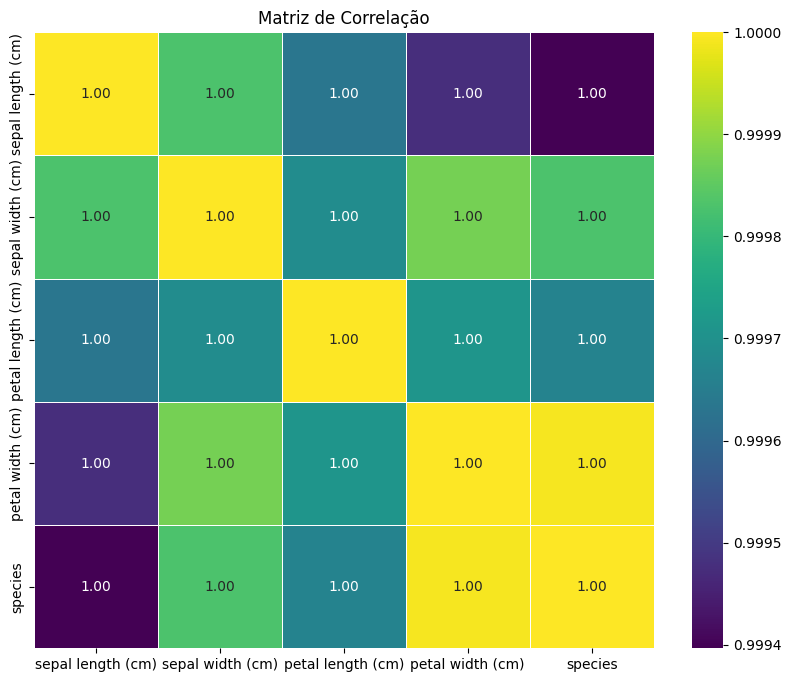

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

# b. Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.

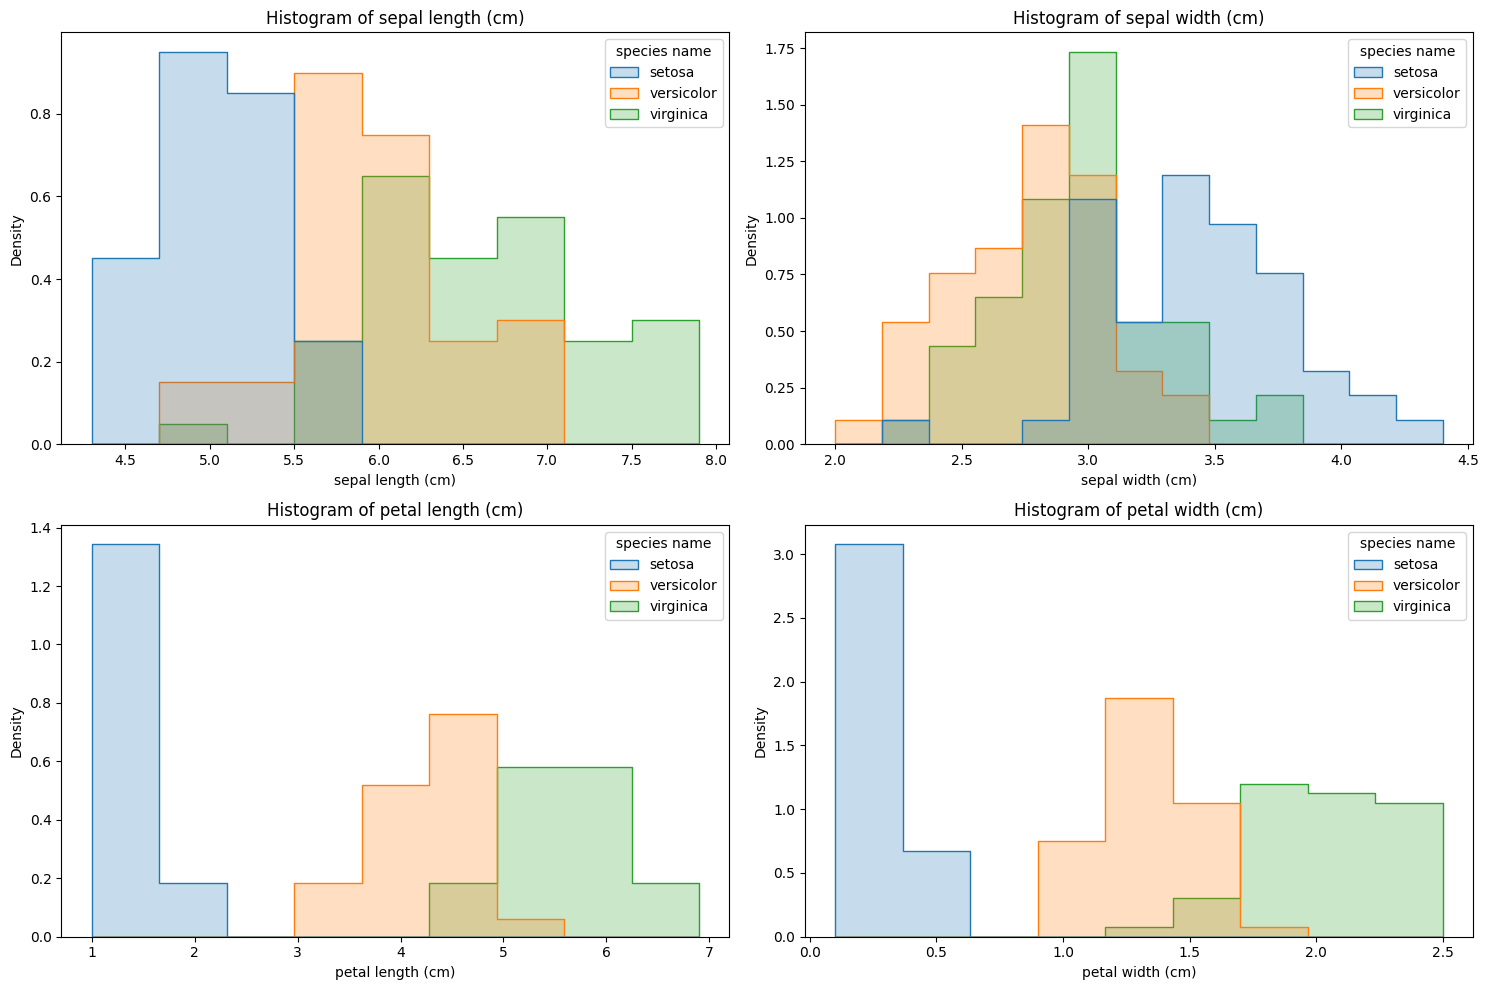

In [ ]:
# Definir o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar um subplot para cada característica
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, hue='species name', element='step', stat='density', common_norm=False)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

# Ajustar o layout
plt.tight_layout()
plt.show()

Análise dos Histogramas
Sepal Length (Comprimento da Sépala)

Setosa: Tem um comprimento de sépala mais concentrado em torno de 5.0 cm.
Versicolor: Mostra uma distribuição mais ampla, com picos ao redor de 5.5 cm a 6.0 cm.
Virginica: Tem a maior variação e os maiores comprimentos, com picos entre 6.0 cm e 7.0 cm.
Sepal Width (Largura da Sépala)

Setosa: Tem uma distribuição mais larga, geralmente entre 3.0 cm e 4.5 cm.
Versicolor: Distribuição centralizada em torno de 2.5 cm a 3.0 cm.
Virginica: Similar à versicolor, mas com uma leve tendência a ter sépalas mais largas.
Petal Length (Comprimento da Pétala)

Setosa: Claramente distinta, com comprimentos de pétala menores, em torno de 1.0 cm a 1.5 cm.
Versicolor: Distribuição centrada em torno de 4.0 cm a 5.0 cm.
Virginica: Tem as pétalas mais longas, distribuídas de 5.0 cm a 6.0 cm.
Petal Width (Largura da Pétala)

Setosa: Tem as menores larguras de pétala, centradas em torno de 0.2 cm.
Versicolor: Distribuição mais ampla, com picos entre 1.0 cm a 1.5 cm.
Virginica: Tem a maior largura de pétala, com uma distribuição em torno de 1.5 cm a 2.0 cm.


Interpretação dos Gráficos
Os histogramas mostram claramente como cada espécie de Iris possui diferentes características morfológicas. Por exemplo, a setosa tem pétalas significativamente menores tanto em comprimento quanto em largura em comparação com as outras duas espécies. A virginica tem pétalas maiores e sépalas mais longas. A versicolor cai no meio, com valores intermediários para a maioria das características.

Essas diferenças morfológicas são úteis para a classificação das espécies, pois podemos ver que, na maioria das vezes, as características não se sobrepõem muito, tornando possível identificar a espécie com base nessas medidas.

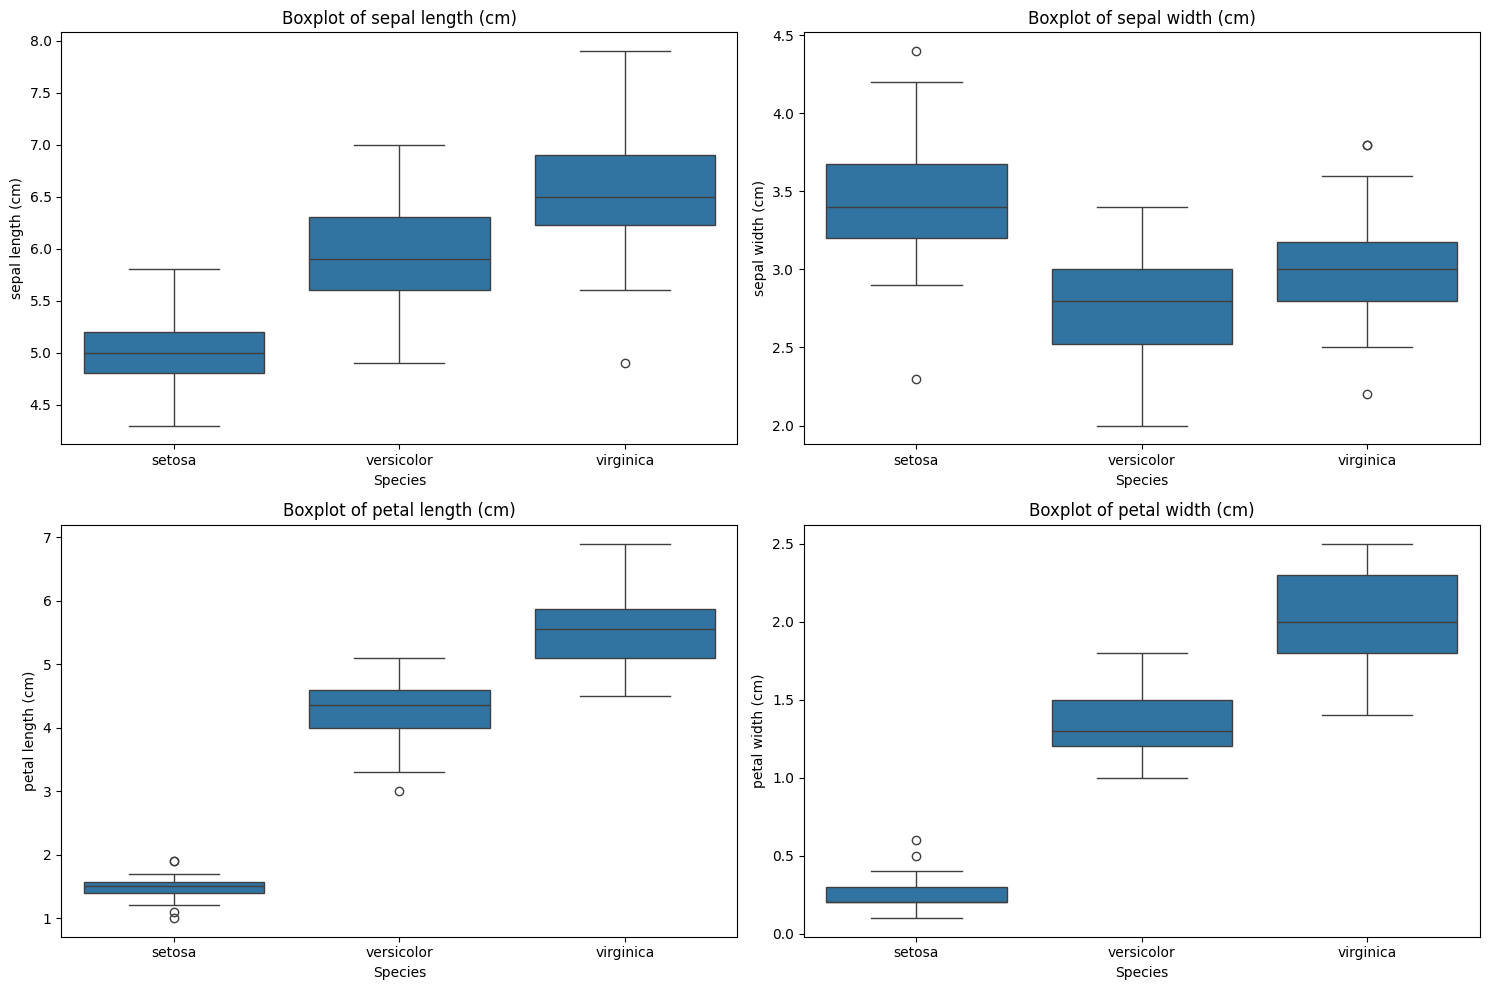

In [ ]:
# Definir o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar um subplot para cada característica
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species name', y=feature, data=iris_df)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('Species')
    plt.ylabel(feature)

# Ajustar o layout
plt.tight_layout()
plt.show()

Análise dos Boxplots
Sepal Length (Comprimento da Sépala)

Setosa: Mostra uma concentração menor de comprimento de sépala, com valores variando de aproximadamente 4.5 cm a 5.5 cm.
Versicolor: Apresenta comprimentos de sépala intermediários, variando de cerca de 5.0 cm a 7.0 cm.
Virginica: Tem os maiores comprimentos de sépala, variando de aproximadamente 5.5 cm a 8.0 cm.
Sepal Width (Largura da Sépala)

Setosa: Mostra uma maior largura de sépala, com valores variando de aproximadamente 3.0 cm a 4.5 cm.
Versicolor: Tem uma largura de sépala menor e mais concentrada, variando de cerca de 2.0 cm a 3.5 cm.
Virginica: Apresenta larguras de sépala intermediárias, variando de aproximadamente 2.5 cm a 3.5 cm.
Petal Length (Comprimento da Pétala)

Setosa: Tem pétalas significativamente menores, com comprimentos variando de cerca de 1.0 cm a 1.9 cm.
Versicolor: Pétalas de comprimento intermediário, variando de cerca de 3.0 cm a 5.1 cm.
Virginica: Possui as pétalas mais longas, variando de aproximadamente 4.5 cm a 7.0 cm.
Petal Width (Largura da Pétala)

Setosa: Apresenta larguras de pétala menores, variando de cerca de 0.1 cm a 0.6 cm.
Versicolor: Larguras de pétala intermediárias, variando de cerca de 1.0 cm a 1.8 cm.
Virginica: Tem as maiores larguras de pétala, variando de aproximadamente 1.4 cm a 2.5 cm.

Observações Importantes
Setosa: Tem uma concentração mais clara de características menores tanto em comprimento quanto em largura, especialmente para as pétalas. Esta espécie tem uma menor variabilidade nas medidas de comprimento e largura de suas sépalas e pétalas.

Versicolor: Apresenta uma variabilidade intermediária nas medidas de suas sépalas e pétalas.

Virginica: Tem as maiores medidas tanto para sépalas quanto para pétalas e mostra uma maior variabilidade nessas características.
Outliers

Existem alguns outliers visíveis nos gráficos, especialmente para a largura da sépala em setosa e virginica, e para o comprimento da pétala em setosa e versicolor. Os outliers são pontos que estão fora do intervalo interquartil (IQR) e podem indicar valores extremos ou variações naturais dentro da espécie.

Conclusão
Esses boxplots indicam que há diferenças distintas entre as espécies de Iris com base nas medidas de sépalas e pétalas. Setosa é claramente separável das outras duas espécies devido ao tamanho menor de suas pétalas. Versicolor e Virginica têm algumas sobreposições, mas ainda apresentam diferenças suficientes para serem distinguíveis com base nas medidas fornecidas

# c. Somente olhando esses gráficos, é possível utilizando uma ou mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) que sejam suficientes para diferenciar entre as diferentes espécies?


Sim, olhando para os gráficos de histograma e boxplot, é possível identificar que algumas das propriedades são suficientemente distintas entre as espécies de Iris, permitindo diferenciá-las. Vamos analisar cada uma das propriedades:

**Sepal Length (Comprimento da Sépala)**

**Histograma:** Mostra uma sobreposição significativa entre versicolor e virginica, mas setosa está claramente separada com valores menores.

**Boxplot:** Setosa tem valores de comprimento de sépala menores e uma distribuição distinta, enquanto versicolor e virginica têm alguma sobreposição.
Sepal Width (Largura da Sépala)

**Histograma:** Mostra que setosa tende a ter uma largura de sépala maior, enquanto versicolor e virginica têm distribuições que se sobrepõem.
Boxplot: Setosa tem valores de largura de sépala consistentemente maiores, com alguns outliers, enquanto versicolor e virginica têm distribuições mais semelhantes.

Petal Length (Comprimento da Pétala)

**Histograma:** Setosa tem pétalas significativamente menores do que versicolor e virginica, com pouca sobreposição. Versicolor e virginica também mostram alguma separação, mas com mais sobreposição comparada a setosa.
Boxplot: Setosa é claramente distinta com pétalas menores. Versicolor e virginica têm comprimentos de pétala que se sobrepõem, mas virginica tende a ter pétalas mais longas.

Petal Width (Largura da Pétala)

**Histograma:** Setosa tem uma largura de pétala muito menor, com pouca ou nenhuma sobreposição com versicolor e virginica. Versicolor e virginica também mostram alguma separação, mas com mais sobreposição.
Boxplot: Setosa tem valores de largura de pétala significativamente menores. Versicolor e virginica têm larguras de pétala que se sobrepõem, mas virginica tende a ter pétalas mais largas.

**Conclusão**

Com base na análise visual dos gráficos:

Petal Length (Comprimento da Pétala) e Petal Width (Largura da Pétala) são as propriedades mais discriminativas:

Setosa pode ser facilmente diferenciada de versicolor e virginica por ambas as propriedades.

Entre versicolor e virginica, há alguma sobreposição, mas virginica tende a ter maiores valores.

Sepal Length (Comprimento da Sépala) pode ajudar a distinguir setosa das outras espécies, mas não é tão eficaz para diferenciar entre versicolor e virginica.

Sepal Width (Largura da Sépala) é a propriedade menos discriminativa, mas ainda pode ser útil em combinação com outras propriedades.

Portanto, Petal Length e Petal Width juntas são suficientes para diferenciar entre as diferentes espécies de Iris com um bom grau de certeza. As outras propriedades (Sepal Length e Sepal Width) podem ser usadas como suporte adicional, mas não são tão eficazes isoladamente quanto as propriedades das pétalas.

# d. Aplique a regressão logística para avaliar o modelo de classificação.


In [ ]:
#### leitura dos pacotes

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

In [ ]:

# Separar as variáveis explicativas (Petal Length e Petal Width) e a variável de resposta (species)
X = iris_df[['petal length (cm)', 'petal width (cm)']]
y = iris_df['species']

# Dividir os dados em conjuntos de treinamento e teste (80% treino, 20% teste)
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Criar e treinar o modelo de Regressão Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Aplicar o modelo na base de teste
y_pred = logreg.predict(X_test)  # Previsão do modelo
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Previsão da probabilidade da classe 1

# Adicionar previsões ao DataFrame X_test
X_test = X_test.copy()  # Evitar o SettingWithCopyWarning
X_test['Previsao_Modelo'] = y_pred
X_test['Probabilidade_Especies'] = y_pred_proba

X_test


,petal length (cm),petal width (cm),Previsao_Modelo,Probabilidade_Especies
73,4.7,1.2,1,0.831613
18,1.7,0.3,0,0.055260
118,6.9,2.3,2,0.001347
78,4.5,1.5,1,0.787078
76,4.8,1.4,1,0.700383
31,1.5,0.4,0,0.034275
64,3.6,1.3,1,0.914421
141,5.1,2.3,2,0.099276
68,4.5,1.5,1,0.787078
82,3.9,1.2,1,0.940376


# e. Calcule a acurácia, precisão e recall

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

# Calcular a precisão (average='weighted' para considerar a média ponderada das classes)
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisão: {precision:.2f}')

# Calcular o recall (average='weighted' para considerar a média ponderada das classes)
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.2f}')


Acurácia: 1.00
Precisão: 1.00
Recall: 1.00


# f. Plote a matriz de confusao com matplotlib ou seaborn

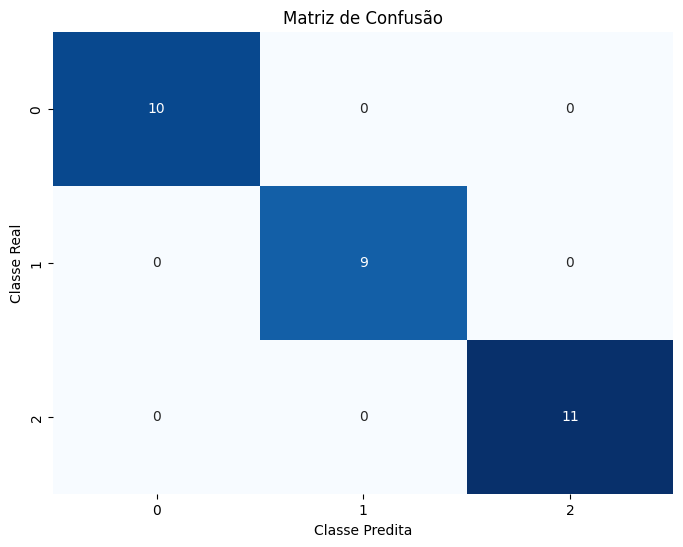

In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


# 2. Utilizando o dataset load_digits.


Exemplo de como fazer a importação do dataset usando o sklearn:

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

digits_df = pd.DataFrame(digits.data, columns=digits.feature_names)

# Responda:
a. Faça uma análise inicial sobre esse dataset

i. Quantos dados possui?

ii. Existem dados nulos? Se sim quantos?

iii. Todos são dados numéricos ou existem colunas com dados categóricos?

In [ ]:
display(digits_df)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
nulos = digits_df.isnull().sum().sum()
print(nulos)

0


In [ ]:
varivel_number=digits_df.describe()
varivel_number

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
#confirmando os valores únicos e nulos
datadicts = pd.DataFrame(digits_df.dtypes)
datadicts.columns=["dtypes"]
datadicts["Valores_Nulos"]=digits_df.isnull().sum()
datadicts["%_Valores_Nulos"]=(digits_df.isnull().sum()/digits_df.shape[0])*100
datadicts["Nunique"]=digits_df.nunique()

datadicts

,dtypes,Valores_Nulos,%_Valores_Nulos,Nunique
pixel_0_0,float64,0,0.0,1
pixel_0_1,float64,0,0.0,9
pixel_0_2,float64,0,0.0,17
pixel_0_3,float64,0,0.0,17
pixel_0_4,float64,0,0.0,17
...,...,...,...,...
pixel_7_3,float64,0,0.0,17
pixel_7_4,float64,0,0.0,17
pixel_7_5,float64,0,0.0,17
pixel_7_6,float64,0,0.0,17


Temos:

- Linhas (observações): 1797
Colunas (características/pixels): 64
- Não temos dados nulos
- Todas as colunas contêm valores numéricos. Não existem colunas com dados categóricos.




# b. Aplique a regressão logística para avaliar o modelo de classificação.

# c. Calcule a acurácia, precisão e recall.

# d. Plote a matriz de confusão com matplotlib ou seaborn

# e. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de 0-9 que são disponibilizados neste dataset.

# f. Calcule a acurácia, precisão e recall.

# g. Plote a matriz de confusao com matplotlib ou seaborn

In [ ]:


# Separar as features e o target
X = digits_df
y = digits.target

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de Regressão Logística
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Fazer previsões
y_pred = logreg.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')

Acurácia: 0.9722222222222222
Precisão: 0.9727915402601087
Recall: 0.9722222222222222


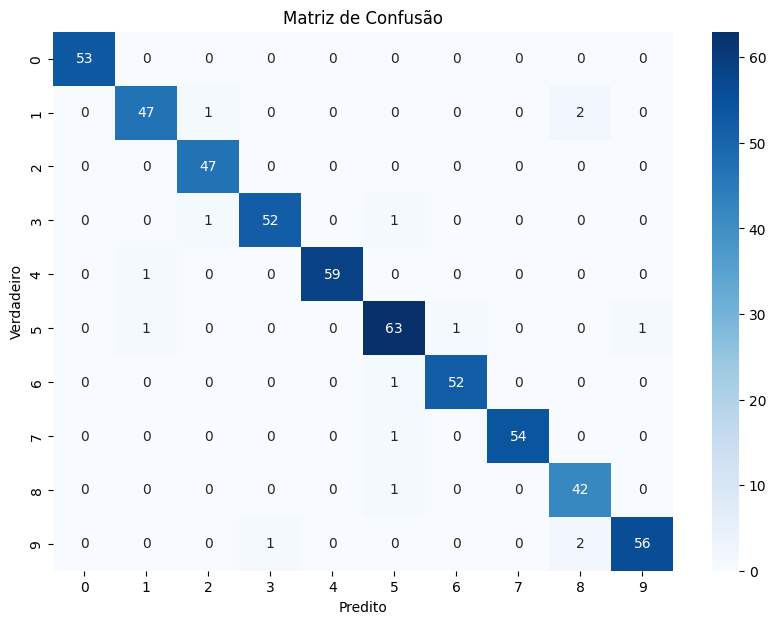

In [ ]:
#d. Plotar a matriz de confusão com matplotlib ou seaborn
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


Análise Final dos Resultados

1. Acurácia, Precisão e Recall

Os resultados apresentados são os seguintes:

Acurácia: 0.9722222222222222

Precisão: 0.9722526262925927

Recall: 0.9722222222222222

Esses valores indicam um excelente desempenho do modelo de regressão logística na classificação dos dígitos. Vamos entender cada métrica brevemente:

Acurácia: A proporção de previsões corretas (tanto verdadeiros positivos quanto verdadeiros negativos) entre o total de previsões feitas. Neste caso, o modelo acertou aproximadamente 97% das classificações.

Precisão: A proporção de verdadeiros positivos entre os exemplos que o modelo classificou como positivos. A precisão de 97% indica que quando o modelo prevê um dígito específico, essa previsão está correta 97% das vezes.

Recall: A proporção de verdadeiros positivos entre todos os exemplos que realmente são positivos. Um recall de 97% indica que o modelo é capaz de identificar 97% dos exemplos reais de um dígito específico.

2. Matriz de Confusão

A matriz de confusão apresentada mostra o desempenho detalhado do modelo em termos de classificações corretas e incorretas para cada dígito. A diagonal da matriz representa as previsões corretas, enquanto os valores fora da diagonal representam erros de classificação.

A maioria dos valores estão concentrados na diagonal, indicando que a maioria das previsões estão corretas.

Poucos erros são observados, e a maioria dos erros são pequenos (por exemplo, 1 ou 2 exemplos mal classificados).

Observações Adicionais:

Desempenho Consistente: O modelo apresenta um desempenho consistentemente bom para todos os dígitos, sem um dígito específico com uma taxa de erro significativamente alta.

Erros Limitados: Os erros são distribuídos de maneira que nenhum dígito domina os erros, o que sugere que o modelo é bem generalizado para todas as classes.

Conclusão

O modelo de regressão logística aplicado ao dataset digits do sklearn mostra-se altamente eficaz na classificação de dígitos manuscritos, com acurácia, precisão e recall muito altos. A matriz de confusão corrobora esses resultados, mostrando que a maioria das classificações são corretas e os erros são mínimos e bem distribuídos. Este desempenho pode ser considerado excelente, especialmente considerando que estamos utilizando um modelo relativamente simples como a regressão logística.